In [ ]:
!pip install scipy
!pip install -U scikit-learn
!pip install wittgenstein

In [1]:
#Disable warning of Ripper implementation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import sklearn
import wittgenstein as lw
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree, svm


In [2]:
data = arff.loadarff('ionosphere.arff')
df_iono = pd.DataFrame(data[0])

data = arff.loadarff('diabetes.arff')
df_diabe = pd.DataFrame(data[0])

data = arff.loadarff('vehicle.arff')
df_Vehicle = pd.DataFrame(data[0])

data = arff.loadarff('vowel.arff')
df_vowel = pd.DataFrame(data[0])

data = arff.loadarff('tae.arff')
df_tae = pd.DataFrame(data[0])

data = arff.loadarff('sonar.arff')
df_sonar = pd.DataFrame(data[0])

data = arff.loadarff('spambase.arff')
df_spambase = pd.DataFrame(data[0])

data = arff.loadarff('page_blocks.arff')
df_page = pd.DataFrame(data[0])

data = arff.loadarff('iris.arff')
df_iris = pd.DataFrame(data[0])

data = arff.loadarff('letter.arff')
df_letter = pd.DataFrame(data[0])

In [3]:
# Changing the last categorical class value into a numerical value
df_iono['class'] = pd.factorize(df_iono['class'])[0]
df_iono.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [4]:
# Changing the last categorical class value into a numerical value
df_diabe['class'] = pd.factorize(df_diabe['class'])[0]
df_diabe.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,1
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0


In [5]:
# Changing the last categorical class value into a numerical value
df_Vehicle['Class'] = pd.factorize(df_Vehicle['Class'])[0]
df_Vehicle.head()

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Class
0,85.0,45.0,80.0,154.0,64.0,9.0,147.0,45.0,19.0,148.0,169.0,324.0,174.0,71.0,1.0,4.0,188.0,199.0,0
1,93.0,35.0,78.0,162.0,60.0,8.0,150.0,45.0,19.0,125.0,172.0,331.0,137.0,67.0,2.0,33.0,191.0,198.0,1
2,108.0,49.0,109.0,204.0,61.0,11.0,212.0,31.0,24.0,159.0,229.0,665.0,215.0,71.0,16.0,11.0,190.0,199.0,1
3,93.0,40.0,73.0,139.0,58.0,6.0,136.0,49.0,18.0,138.0,166.0,275.0,137.0,73.0,0.0,0.0,187.0,188.0,0
4,100.0,58.0,109.0,230.0,70.0,11.0,226.0,30.0,25.0,182.0,234.0,752.0,207.0,72.0,0.0,13.0,187.0,198.0,1


In [6]:
# Changing the last categorical class value into a numerical value
df_vowel['Class'] = pd.factorize(df_vowel['Class'])[0]
df_vowel.head()

,TT,SpeakerNumber,Sex,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,0.0,0.0,0.0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,0
1,0.0,0.0,0.0,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,1
2,0.0,0.0,0.0,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,1
3,0.0,0.0,0.0,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,1
4,0.0,0.0,0.0,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,1


In [7]:
# Changing the last categorical class value into a numerical value
df_tae['Class_attribute'] = pd.factorize(df_tae['Class_attribute'])[0]
df_tae.head()

,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
0,b'1',23.0,3.0,b'1',19.0,0
1,b'2',15.0,3.0,b'1',17.0,0
2,b'1',23.0,3.0,b'2',49.0,0
3,b'1',5.0,2.0,b'2',33.0,0
4,b'2',7.0,11.0,b'2',55.0,0


In [8]:
# Changing the last categorical class value into a numerical value
df_sonar['Class'] = pd.factorize(df_sonar['Class'])[0]
df_sonar.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [9]:
# Changing the last categorical class value into a numerical value
df_spambase['class'] = pd.factorize(df_spambase['class'])[0]
df_spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,0


In [10]:
# Changing the last categorical class value into a numerical value
df_page['Class'] = pd.factorize(df_page['Class'])[0]
df_page.head()

,Height,Lenght,Area,Eccen,P_black,P_and,Mean_tr,Blackpix,Blackand,Wb_trans,Class
0,5.0,7.0,35.0,1.400,0.400,0.657,2.33,14.0,23.0,6.0,0
1,6.0,7.0,42.0,1.167,0.429,0.881,3.60,18.0,37.0,5.0,0
2,6.0,18.0,108.0,3.000,0.287,0.741,4.43,31.0,80.0,7.0,0
3,5.0,7.0,35.0,1.400,0.371,0.743,4.33,13.0,26.0,3.0,0
4,6.0,3.0,18.0,500.000,0.500,0.944,2.25,9.0,17.0,4.0,0


In [11]:
# Changing the last categorical class value into a numerical value
df_iris['class'] = pd.factorize(df_iris['class'])[0]
df_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Changing the last categorical class value into a numerical value
df_letter['class'] = pd.factorize(df_letter['class'])[0]
df_letter.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,0
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,1
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,2
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,3
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,3


In [13]:
trainIono, testIono = train_test_split(df_iono, test_size=.33)

trainDiabe, testDiabe = train_test_split(df_diabe, test_size=.33)

trainVehicle, testVehicle = train_test_split(df_Vehicle, test_size=.33)

trainVowel, testVowel = train_test_split(df_vowel, test_size=.33)

trainTae, testTae = train_test_split(df_tae, test_size=.33)

trainSonar, testSonar = train_test_split(df_sonar, test_size=.33)

trainSpambase, testSpambase = train_test_split(df_spambase, test_size=.33)

trainPage, testPage = train_test_split(df_page, test_size=.33)

trainIris, testIris = train_test_split(df_iris, test_size=.33)

trainLetter, testLetter = train_test_split(df_letter, test_size=.33)

# Ripper vs Decision trees

In [16]:
X_trainIono = trainIono.drop('class', axis=1)
y_trainIono = trainIono['class']
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(X_trainIono, y_trainIono)
# Print model
print(ripper_clf.out_model())

[[a05=<0.0] V
[a28=>0.74 ^ a05=>0.98] V
[a33=>0.88 ^ a08=<-0.576] V
[a07=<0.0 ^ a21=-0.2-0.0]]
None


[Text(0.3472222222222222, 0.95, 'x[4] <= 0.146\ngini = 0.454\nsamples = 235\nvalue = [153, 82]'),
 Text(0.1111111111111111, 0.85, 'x[4] <= 0.033\ngini = 0.038\nsamples = 51\nvalue = [1, 50]'),
 Text(0.05555555555555555, 0.75, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(0.16666666666666666, 0.75, 'x[16] <= 0.423\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1111111111111111, 0.65, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2222222222222222, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5833333333333334, 0.85, 'x[26] <= 1.0\ngini = 0.287\nsamples = 184\nvalue = [152, 32]'),
 Text(0.4444444444444444, 0.75, 'x[7] <= -0.525\ngini = 0.133\nsamples = 153\nvalue = [142, 11]'),
 Text(0.3333333333333333, 0.65, 'x[9] <= -0.202\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2777777777777778, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3888888888888889, 0.55, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.65, 'x[33] <

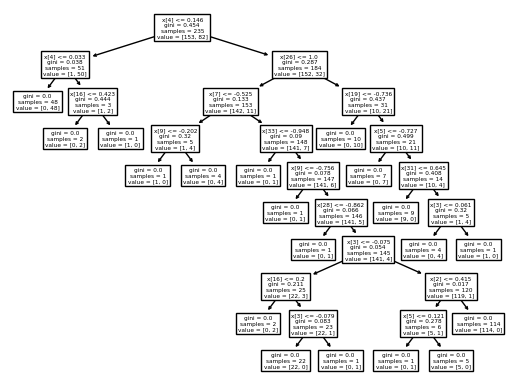

In [17]:
tree_cf = tree.DecisionTreeClassifier()
tree_cf.fit(X_trainIono,y_trainIono)
tree.plot_tree(tree_cf)

In [18]:
# Score
X_testIono = testIono.drop('class', axis=1)
y_testIono = testIono['class']
print(ripper_clf.score(X_testIono, y_testIono))

0.896551724137931


In [19]:
print(tree_cf.score(X_testIono, y_testIono))

0.853448275862069


In [20]:
X_trainDiabe = trainDiabe.drop('class', axis=1)
y_trainDiabe = trainDiabe['class']
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(X_trainDiabe, y_trainDiabe)
# Print model
print(ripper_clf.out_model())

[[age=<22.0] V
[plas=<85.0] V
[mass=<23.33] V
[mass=23.33-25.86] V
[mass=25.86-28.0] V
[insu=71.0-105.0 ^ skin=34.0-40.0] V
[insu=27.5-71.0] V
[pres=78.0-82.0 ^ preg=<1.0] V
[plas=101.0-108.0 ^ preg=4.0-5.0]]
None


[Text(0.45128398791540786, 0.9705882352941176, 'x[1] <= 127.5\ngini = 0.46\nsamples = 514\nvalue = [184, 330]'),
 Text(0.18504531722054382, 0.9117647058823529, 'x[7] <= 28.5\ngini = 0.303\nsamples = 322\nvalue = [60, 262]'),
 Text(0.09063444108761329, 0.8529411764705882, 'x[0] <= 7.5\ngini = 0.132\nsamples = 183\nvalue = [13, 170]'),
 Text(0.07854984894259819, 0.7941176470588235, 'x[5] <= 45.4\ngini = 0.123\nsamples = 182\nvalue = [12, 170]'),
 Text(0.06646525679758308, 0.7352941176470589, 'x[5] <= 30.9\ngini = 0.114\nsamples = 181\nvalue = [11, 170]'),
 Text(0.02416918429003021, 0.6764705882352942, 'x[6] <= 0.672\ngini = 0.019\nsamples = 102\nvalue = [1, 101]'),
 Text(0.012084592145015106, 0.6176470588235294, 'gini = 0.0\nsamples = 89\nvalue = [0, 89]'),
 Text(0.03625377643504532, 0.6176470588235294, 'x[6] <= 0.686\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.02416918429003021, 0.5588235294117647, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.04833836858006042, 0.5588

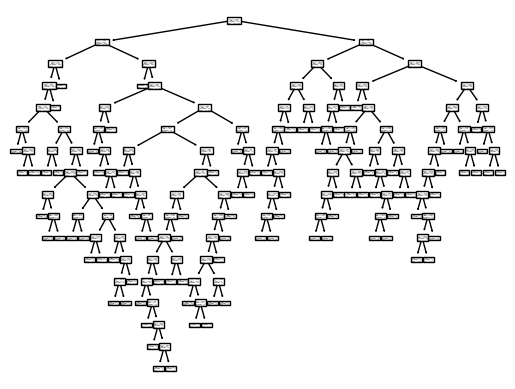

In [21]:
tree_cf = tree.DecisionTreeClassifier()
tree_cf.fit(X_trainDiabe,y_trainDiabe)
tree.plot_tree(tree_cf)

In [22]:
# Score
X_testDiabe = testDiabe.drop('class', axis=1)
y_testDiabe = testDiabe['class']
print(ripper_clf.score(X_testDiabe, y_testDiabe))

0.6456692913385826


In [23]:
print(tree_cf.score(X_testDiabe, y_testDiabe))

0.7007874015748031


In [24]:
X_trainVehicle = trainVehicle.drop('Class', axis=1)
y_trainVehicle = trainVehicle['Class']
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(X_trainVehicle, y_trainVehicle)
# Print model
print(ripper_clf.out_model())

[[Elongatedness=<31.0] V
[Praxis_rectangular=20.0-22.0] V
[Praxis_rectangular=22.0-24.0] V
[Praxis_rectangular=18.0-19.0 ^ Max_length_aspect_ratio=6.0-7.0] V
[Max_length_aspect_ratio=<6.0 ^ Praxis_rectangular=18.0-19.0] V
[Major_variance=179.0-192.0] V
[Length_rectangular=<129.0 ^ Minor_variance=259.5-304.0] V
[Length_rectangular=129.0-134.0 ^ Elongatedness=39.0-43.0] V
[Max_length_aspect_ratio=7.0-8.0 ^ Praxis_rectangular=18.0-19.0] V
[Major_variance=192.0-209.0] V
[Length_rectangular=134.0-140.0 ^ Minor_kurtosis=<2.0]]
None


[Text(0.49320652173913043, 0.9583333333333334, 'x[7] <= 42.5\ngini = 0.352\nsamples = 566\nvalue = [129, 437]'),
 Text(0.29347826086956524, 0.875, 'x[10] <= 176.5\ngini = 0.021\nsamples = 281\nvalue = [3, 278]'),
 Text(0.25, 0.7916666666666666, 'x[16] <= 190.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.20652173913043478, 0.7083333333333334, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.29347826086956524, 0.7083333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.33695652173913043, 0.7916666666666666, 'gini = 0.0\nsamples = 272\nvalue = [0, 272]'),
 Text(0.6929347826086957, 0.875, 'x[5] <= 8.5\ngini = 0.493\nsamples = 285\nvalue = [126, 159]'),
 Text(0.5163043478260869, 0.7916666666666666, 'x[6] <= 143.5\ngini = 0.405\nsamples = 213\nvalue = [60, 153]'),
 Text(0.3804347826086957, 0.7083333333333334, 'x[9] <= 138.5\ngini = 0.493\nsamples = 104\nvalue = [58, 46]'),
 Text(0.2391304347826087, 0.625, 'x[11] <= 214.5\ngini = 0.457\nsamples = 65\nvalue = [23, 42]'

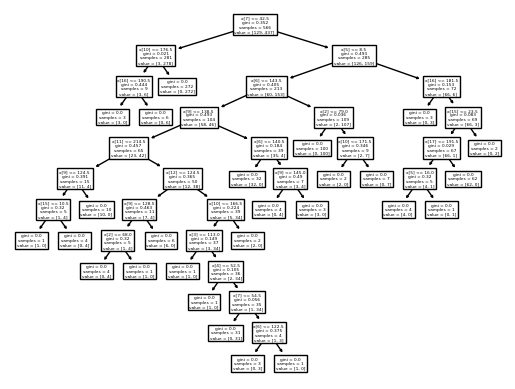

In [25]:
tree_cf = tree.DecisionTreeClassifier()
tree_cf.fit(X_trainVehicle,y_trainVehicle)
tree.plot_tree(tree_cf)

In [26]:
# Score
X_testVehicle = testVehicle.drop('Class', axis=1)
y_testVehicle = testVehicle['Class']
print(ripper_clf.score(X_testVehicle, y_testVehicle))

0.9


In [27]:
print(tree_cf.score(X_testVehicle, y_testVehicle))

0.9357142857142857


In [28]:
X_trainVowel = trainVowel.drop('Class', axis=1)
y_trainVowel = trainVowel['Class']
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(X_trainVowel, y_trainVowel)
# Print model
print(ripper_clf.out_model())

[[F6=-0.094-0.02] V
[F1=>3.39] V
[F1=2.54-2.91] V
[F1=1.59-1.87] V
[F1=2.91-3.39] V
[F1=2.17-2.54] V
[F1=1.27-1.59] V
[F1=0.88-1.27] V
[F1=1.87-2.17] V
[F9=-0.3--0.14] V
[F3=-0.39--0.15] V
[F2=-1.12--0.9]]
None


[Text(0.5125, 0.9166666666666666, 'x[4] <= 0.344\ngini = 0.163\nsamples = 661\nvalue = [59, 602]'),
 Text(0.25, 0.75, 'x[6] <= 0.9\ngini = 0.414\nsamples = 65\nvalue = [46, 19]'),
 Text(0.1, 0.5833333333333334, 'x[5] <= -1.329\ngini = 0.423\nsamples = 23\nvalue = [7, 16]'),
 Text(0.05, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.15, 0.4166666666666667, 'x[9] <= 0.683\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.5833333333333334, 'x[8] <= 0.519\ngini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(0.35, 0.4166666666666667, 'x[9] <= -0.848\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.45, 0.4166666666666667, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.775, 0.75, 'x[5] <= 1.087\ngini = 

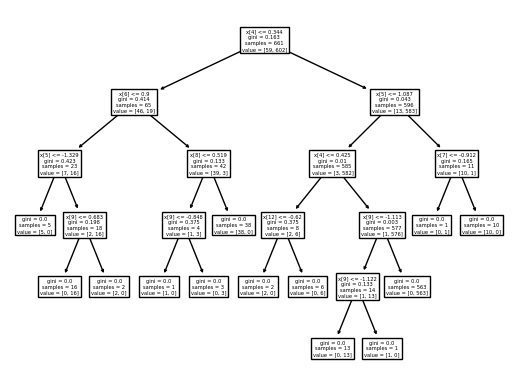

In [29]:
tree_cf = tree.DecisionTreeClassifier()
tree_cf.fit(X_trainVowel,y_trainVowel)
tree.plot_tree(tree_cf)

In [30]:
# Score
X_testVowel = testVowel.drop('Class', axis=1)
y_testVowel = testVowel['Class']
print(ripper_clf.score(X_testVowel, y_testVowel))

0.9113149847094801


In [31]:
print(tree_cf.score(X_testVowel, y_testVowel))

0.9847094801223242


# Decision trees vs SVM

In [14]:
X_trainTae = trainTae.drop('Class_attribute', axis=1)
y_trainTae = trainTae['Class_attribute']

X_testTae = testTae.drop('Class_attribute', axis=1)
y_testTae = testTae['Class_attribute']

In [15]:
X_trainSonar = trainSonar.drop('Class', axis=1)
y_trainSonar = trainSonar['Class']

X_testSonar = testSonar.drop('Class', axis=1)
y_testSonar = testSonar['Class']

In [16]:
X_trainSpambase = trainSpambase.drop('class', axis=1)
y_trainSpambase = trainSpambase['class']

X_testSpambase = testSpambase.drop('class', axis=1)
y_testSpambase = testSpambase['class']

In [17]:
X_trainPage = trainPage.drop('Class', axis=1)
y_trainPage = trainPage['Class']

X_testPage = testPage.drop('Class', axis=1)
y_testPage = testPage['Class']

In [18]:
X_trainIris = trainIris.drop('class', axis=1)
y_trainIris = trainIris['class']

X_testIris = testIris.drop('class', axis=1)
y_testIris = testIris['class']

In [19]:
X_trainLetter = trainLetter.drop('class', axis=1)
y_trainLetter = trainLetter['class']

X_testLetter = testLetter.drop('class', axis=1)
y_testLetter = testLetter['class']

In [38]:
clf_svm = svm.SVC(kernel='linear', C=1)
clf_tree = tree.DecisionTreeClassifier()

In [39]:
clf_svm.fit(X_trainIono, y_trainIono)
print(clf_svm.score(X_testIono, y_testIono))

0.853448275862069


In [40]:
clf_tree.fit(X_trainIono, y_trainIono)
print(clf_tree.score(X_testIono, y_testIono))

0.8879310344827587


In [41]:
clf_svm.fit(X_trainDiabe, y_trainDiabe)
print(clf_svm.score(X_testDiabe, y_testDiabe))

0.7637795275590551


In [42]:
clf_tree.fit(X_trainDiabe, y_trainDiabe)
print(clf_tree.score(X_testDiabe, y_testDiabe))

0.6653543307086615


In [43]:
clf_svm.fit(X_trainVowel, y_trainVowel)
print(clf_svm.score(X_testVowel, y_testVowel))

0.9694189602446484


In [44]:
clf_tree.fit(X_trainVowel, y_trainVowel)
print(clf_tree.score(X_testVowel, y_testVowel))

0.9785932721712538


In [45]:
clf_svm.fit(X_trainVehicle, y_trainVehicle)
print(clf_svm.score(X_testVehicle, y_testVehicle))

0.9642857142857143


In [46]:
clf_tree.fit(X_trainVehicle, y_trainVehicle)
print(clf_tree.score(X_testVehicle, y_testVehicle))

0.9392857142857143


In [47]:
clf_svm.fit(X_trainTae, y_trainTae)
print(clf_svm.score(X_testTae, y_testTae))

0.44


In [48]:
clf_tree.fit(X_trainTae, y_trainTae)
print(clf_tree.score(X_testTae, y_testTae))

0.66


In [49]:
clf_svm.fit(X_trainSonar, y_trainSonar)
print(clf_svm.score(X_testSonar, y_testSonar))

0.7536231884057971


In [50]:
clf_tree.fit(X_trainSonar, y_trainSonar)
print(clf_tree.score(X_testSonar, y_testSonar))

0.6376811594202898


In [51]:
clf_svm.fit(X_trainSpambase, y_trainSpambase)
print(clf_svm.score(X_testSpambase, y_testSpambase))

0.9144173798551679


In [52]:
clf_tree.fit(X_trainSpambase, y_trainSpambase)
print(clf_tree.score(X_testSpambase, y_testSpambase))

0.9190256747860435


In [53]:
clf_svm.fit(X_trainPage, y_trainPage)
print(clf_svm.score(X_testPage, y_testPage))

0.9302325581395349


In [54]:
clf_tree.fit(X_trainPage, y_trainPage)
print(clf_tree.score(X_testPage, y_testPage))

0.9590254706533776


In [55]:
clf_svm.fit(X_trainIris, y_trainIris)
print(clf_svm.score(X_testIris, y_testIris))

1.0


In [56]:
clf_tree.fit(X_trainIris, y_trainIris)
print(clf_tree.score(X_testIris, y_testIris))

0.94


In [57]:
clf_svm.fit(X_trainLetter, y_trainLetter)
print(clf_svm.score(X_testLetter, y_testLetter))

0.8546969696969697


In [58]:
clf_tree.fit(X_trainLetter, y_trainLetter)
print(clf_tree.score(X_testLetter, y_testLetter))

0.8656060606060606


## Crossvalidation

In [20]:
# Set the parameters by cross-validation
parameters = [
 {"kernel": ["rbf"], "gamma": [0.01, 0.1, 1.0], "C": [1, 10, 100, 1000]},
 {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

In [21]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

# Train the SVM model
svm_model = svm.SVC()
optimal = GridSearchCV(estimator=svm_model, cv=sss, param_grid=parameters, n_jobs=-1)

In [61]:
optimal.fit(X_trainIono, y_trainIono)
print(f"The best accuracy was obtained with the following SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"If we use the test dataset we obtain the following score:")
print(f"score = {optimal.score(X_testIono, y_testIono)}")

The best accuracy was obtained with the following SVM:
Best params -> {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score -> 0.952542372881356


In [62]:
optimal.fit(X_trainDiabe, y_trainDiabe)
print(f"The best accuracy was obtained with the following SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"If we use the test dataset we obtain the following score:")
print(f"score = {optimal.score(X_testDiabe, y_testDiabe)}")

The best accuracy was obtained with the following SVM:
Best params -> {'C': 100, 'kernel': 'linear'}
Best score -> 0.7565891472868217


In [63]:
optimal.fit(X_trainVehicle, y_trainVehicle)
print(f"The best accuracy was obtained with the following SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"If we use the test dataset we obtain the following score:")
print(f"score = {optimal.score(X_testVehicle, y_testVehicle)}")

The best accuracy was obtained with the following SVM:
Best params -> {'C': 1, 'kernel': 'linear'}
Best score -> 0.952112676056338


In [64]:
optimal.fit(X_trainVowel, y_trainVowel)
print(f"The best accuracy was obtained with the following SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"If we use the test dataset we obtain the following score:")
print(f"score = {optimal.score(X_testVowel, y_testVowel)}")

The best accuracy was obtained with the following SVM:
Best params -> {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best score -> 0.9987951807228915


In [65]:
optimal.fit(X_trainTae, y_trainTae)
print(f"The best accuracy was obtained with the following SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"If we use the test dataset we obtain the following score:")
print(f"score = {optimal.score(X_testTae, y_testTae)}")

The best accuracy was obtained with the following SVM:
Best params -> {'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}
Best score -> 0.49230769230769234


In [66]:
optimal.fit(X_trainSonar, y_trainSonar)
print(f"The best accuracy was obtained with the following SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"If we use the test dataset we obtain the following score:")
print(f"score = {optimal.score(X_testSonar, y_testSonar)}")

The best accuracy was obtained with the following SVM:
Best params -> {'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}
Best score -> 0.8857142857142856


In [ ]:
optimal.fit(X_trainSpambase, y_trainSpambase)
print(f"The best accuracy was obtained with the following SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"If we use the test dataset we obtain the following score:")
print(f"score = {optimal.score(X_testSpambase, y_testSpambase)}")

In [22]:
optimal.fit(X_trainPage, y_trainPage)
print(f"The best accuracy was obtained with the following SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"If we use the test dataset we obtain the following score:")
print(f"score = {optimal.score(X_testPage, y_testPage)}")

The best accuracy was obtained with the following SVM:
Best params -> {'C': 1, 'kernel': 'linear'}
Best score -> 0.9452562704471102
If we use the test dataset we obtain the following score:
score = 0.9462901439645626


In [23]:
optimal.fit(X_trainIris, y_trainIris)
print(f"The best accuracy was obtained with the following SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"If we use the test dataset we obtain the following score:")
print(f"score = {optimal.score(X_testIris, y_testIris)}")

The best accuracy was obtained with the following SVM:
Best params -> {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score -> 0.976
If we use the test dataset we obtain the following score:
score = 0.98


In [24]:
optimal.fit(X_trainLetter, y_trainLetter)
print(f"The best accuracy was obtained with the following SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"If we use the test dataset we obtain the following score:")
print(f"score = {optimal.score(X_testLetter, y_testLetter)}")

The best accuracy was obtained with the following SVM:
Best params -> {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score -> 0.962686567164179
If we use the test dataset we obtain the following score:
score = 0.9722727272727273
